<a href="https://colab.research.google.com/github/sofipop/MetodosNumericos/blob/Aplicaciones/Ejercicio_epidemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#MARTINEZ HERNANDEZ KAREN SOFIA
from math import *
import numpy as np
import matplotlib . pyplot as plt

((0.0, 15.0), (0.0, 300.0), None, <matplotlib.legend.Legend at 0x7f4b1ad7fd00>)

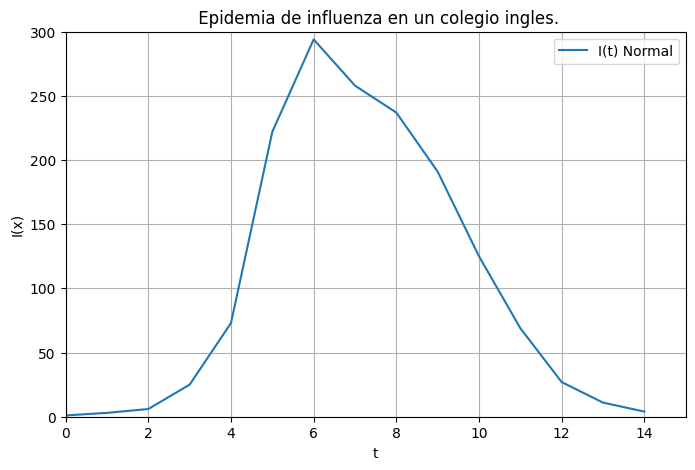

In [6]:
xi =np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
fi =np.array([1,3,6,25,73,222,294,258,237,191,125,69,27,11,4])

xn = np.linspace(0, 15, 70)
plt.figure(figsize = (8,5))
plt.plot(xi,fi,label='I(t) Normal')
plt.xlabel('t'); plt.ylabel('I(x)');
plt.title(" Epidemia de influenza en un colegio ingles.")
plt.xlim([0,15]),plt.ylim([0,300]),plt.grid(),plt.legend()

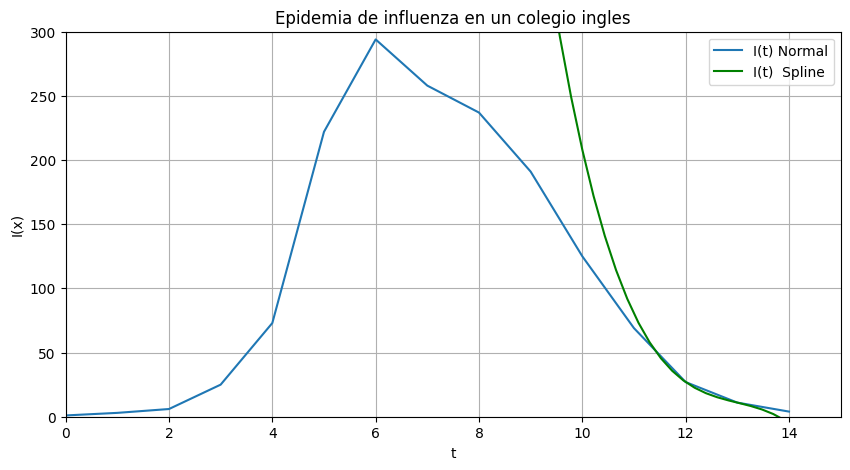

In [7]:
#USANDO EL CODIGO DE SPLINE CUBICO

xi =np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
fi =np.array([1,3,6,25,73,222,294,258,237,191,125,69,27,11,4])
xn = np.linspace(0, 15, 70)
ni=(xi.size)
n=ni-1
A= np.zeros (ni)
a=np.zeros(n)
A[:]= fi
s=np.zeros(n)

for i in range(0,n):
  s[i]=xi[i+1]-xi[i]
for j in range(0,n):
  a[j]=(3*(A[j+1]-A[j]))/s[j]-(3*(A[j]-A[j-1]))/s[j-1]
#Valores
l=np.zeros(n)
m=np.zeros(n)
z=np.zeros(n)
l[0]=1
for k in range(1,n-1):
  l[k]=2*(xi[k+1]-xi[k-1])-s[k-1]*m[k-1]
  m[k]=s[k]/l[k]
  z[k]=(a[k]-s[k-1]*z[k-1])/l[k]
l[n-1]=1

d=np.zeros(n)
c=np.zeros(ni)
b=np.zeros(n)

t=n-1
while t>=0:
  c[t]=z[t]-m[t]*c[t-1]
  b[t]=(A[t+1]-A[t])/s[t]-(s[t]*(c[t+1]+2*c[t]))/3
  d[t]=(c[t+1]-c[t])/(3*s[t])
  t-=1
fn=np.zeros(len(xn))

for j in range(0,n-1):
  for i in range(0,len(xn)):
    fn[i]=A[j]+b[j]*(xn[i]-xi[j])+c[j]*(xn[i]-xi[j])**2+d[j]*(xn[i]-xi[j])**3

plt.figure(figsize = (10,5))
plt.plot(xi,fi,label='I(t) Normal')
plt.plot(xn, fn, 'g',label='I(t)  Spline')
plt.xlabel('t'); plt.ylabel('I(x)');
plt.title("Epidemia de influenza en un colegio ingles")
plt.xlim([0,15]),plt.ylim([0,300]),plt.grid(),plt.legend()
plt.show()